In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
data={
    "passenger id":np.arange(0,1000),
    "survived": np.random.choice(['yes','no'], size=1000),
    "pclass": np.random.choice(['top', 'ave','poor'], size=1000),
    "age":np.random.randint(10,80, size=1000),
    "sib": np.random.choice(['no', 'yes'], size=1000),
    "name": ["Mo_"+str(i) for i in range(0,1000)],
    "sex": np.random.choice(['M', 'F'] ,size=1000)

}
df=pd.DataFrame(data)

In [83]:
df.head()

passenger id survived pclass  age  sib  name sex
0             0       no   poor   38  yes  Mo_0   M
1             1       no   poor   31  yes  Mo_1   M
2             2      yes    ave   19   no  Mo_2   M
3             3      yes    ave   31  yes  Mo_3   F
4             4      yes   poor   61   no  Mo_4   M

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   passenger id  1000 non-null   int64 
 1   survived      1000 non-null   object
 2   pclass        1000 non-null   object
 3   age           1000 non-null   int64 
 4   sib           1000 non-null   object
 5   name          1000 non-null   object
 6   sex           1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [85]:
df.describe()

passenger id          age
count   1000.000000  1000.000000
mean     499.500000    45.095000
std      288.819436    20.041648
min        0.000000    10.000000
25%      249.750000    28.000000
50%      499.500000    45.500000
75%      749.250000    62.000000
max      999.000000    79.000000

In [86]:
df.isnull().sum()

passenger id    0
survived        0
pclass          0
age             0
sib             0
name            0
sex             0
dtype: int64

<Axes: >

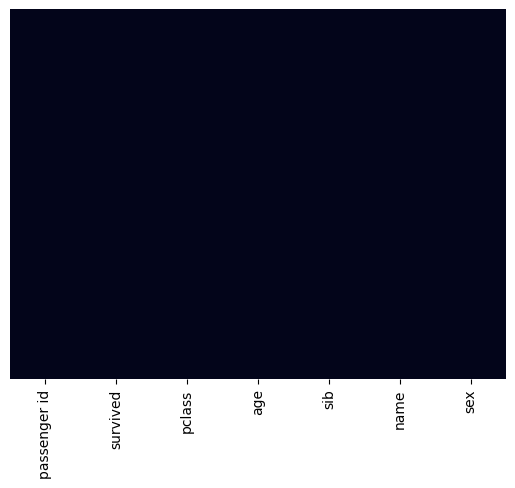

In [87]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

<Axes: xlabel='survived', ylabel='count'>

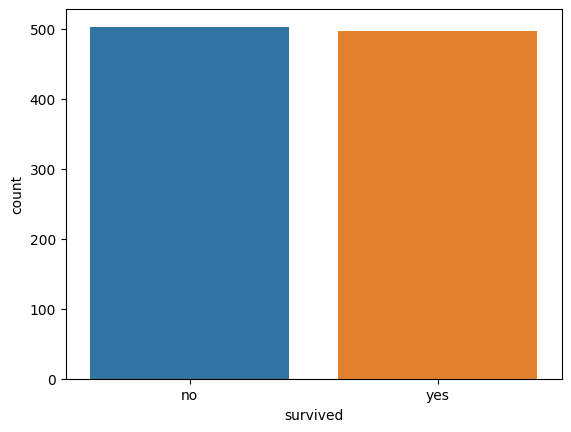

In [88]:
sns.countplot(data=df, x='survived')

<Axes: xlabel='survived', ylabel='count'>

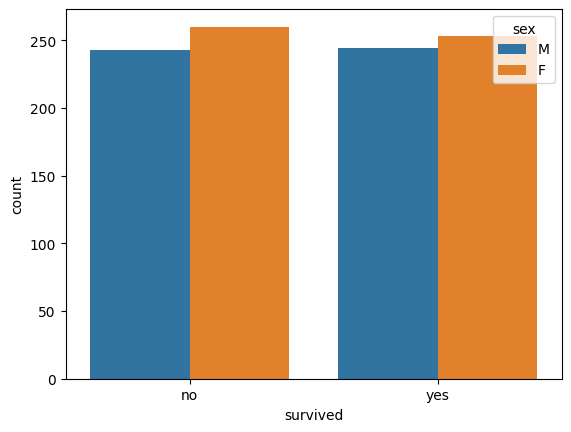

In [89]:
sns.countplot(data=df, x='survived', hue='sex')

In [90]:
sns.countplot(data=df, x='survived', hue='pclass')

<Axes: xlabel='survived', ylabel='count'>

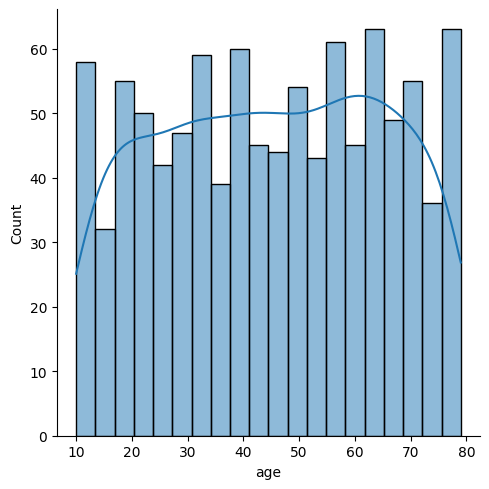

In [91]:
sns.displot(data=df, x='age',kde=True, bins=20)

In [92]:
sns.boxenplot(data=df, x='pclass', y='age')

<Axes: xlabel='pclass', ylabel='age'>

In [93]:
#cleaning data
from sklearn.preprocessing import LabelEncoder


In [94]:
mypreprocess=LabelEncoder()
df['name_coded']=mypreprocess.fit_transform(df['name'])
df['sex_coded']=mypreprocess.fit_transform(df['sex'])
df['sib_coded']=mypreprocess.fit_transform(df['sib'])
df['survived_coded']=mypreprocess.fit_transform(df['survived'])
df['pclass']=mypreprocess.fit_transform(df['pclass'])
df.head()

passenger id survived  pclass  age  sib  name sex  name_coded  sex_coded  \
0             0       no       1   38  yes  Mo_0   M           0          1   
1             1       no       1   31  yes  Mo_1   M           1          1   
2             2      yes       0   19   no  Mo_2   M         112          1   
3             3      yes       0   31  yes  Mo_3   F         223          0   
4             4      yes       1   61   no  Mo_4   M         334          1   

   sib_coded  survived_coded  
0          1               0  
1          1               0  
2          0               1  
3          1               1  
4          0               1

In [95]:
df.drop(columns=['name', 'survived', 'sib','sex'], axis=1,inplace=True)
df.head()

passenger id  pclass  age  name_coded  sex_coded  sib_coded  survived_coded
0             0       1   38           0          1          1               0
1             1       1   31           1          1          1               0
2             2       0   19         112          1          0               1
3             3       0   31         223          0          1               1
4             4       1   61         334          1          0               1

In [96]:
#buildinging model
X=df.drop('survived_coded', axis=1)
y=df['survived_coded']

In [97]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=20)

<IPython.core.display.Javascript object>

In [98]:
X_train

passenger id  pclass  age  name_coded  sex_coded  sib_coded
504           504       2   32         451          1          1
839           839       1   22         822          0          0
141           141       1   41          48          1          0
825           825       1   66         807          1          0
470           470       2   12         413          0          0
..            ...     ...  ...         ...        ...        ...
924           924       1   65         917          0          0
223           223       0   79         139          0          1
271           271       0   28         192          1          1
474           474       2   32         417          0          1
355           355       2   23         285          1          1

[800 rows x 6 columns]

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
my_model=LogisticRegression()

In [101]:
my_model.fit(X_train, y_train)

LogisticRegression()

In [103]:
acc=my_model.score(X_test, y_test)
acc

0.49

In [104]:
pred=my_model.predict(X_test)

In [105]:
#Evaluatiion
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[49 58]
 [44 49]]
              precision    recall  f1-score   support

           0       0.53      0.46      0.49       107
           1       0.46      0.53      0.49        93

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

